## House price prediction:

*  Create a model that predicts a continuous value (price) from input features square footage,number of bedrooms and bathrooms.
*   Implement a univariate Model using Least Squares and plot best-fit line.
*   Implement a multivariate Model using Least Squares and plot best-fit line.
*   Retrieve model error and model coefficients.
*   Observe Variance Inflation Factor(VIF).
*   Implement Ridge regression model.
*   Implement LASSO regression model.
*   Report your observations on the above models for house prediction.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Ridge, Lasso

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Housing.csv") # Loading the dataset

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Datasets/Housing.csv'

In [ ]:
# Checking NaN values
df.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
# Converting categorical labels to numerical
le = LabelEncoder()
df['mainroad']=le.fit_transform(df['mainroad'])
df['guestroom']=le.fit_transform(df['guestroom'])
df['basement']=le.fit_transform(df['basement'])
df['furnishingstatus']=le.fit_transform(df['furnishingstatus'])

NameError: name 'df' is not defined

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,no,yes,2,yes,0
1,12250000,8960,4,4,4,1,0,0,no,yes,3,no,0
2,12250000,9960,3,2,2,1,0,1,no,no,2,yes,1
3,12215000,7500,4,2,2,1,0,1,no,yes,3,yes,0
4,11410000,7420,4,1,2,1,1,1,no,yes,2,no,0


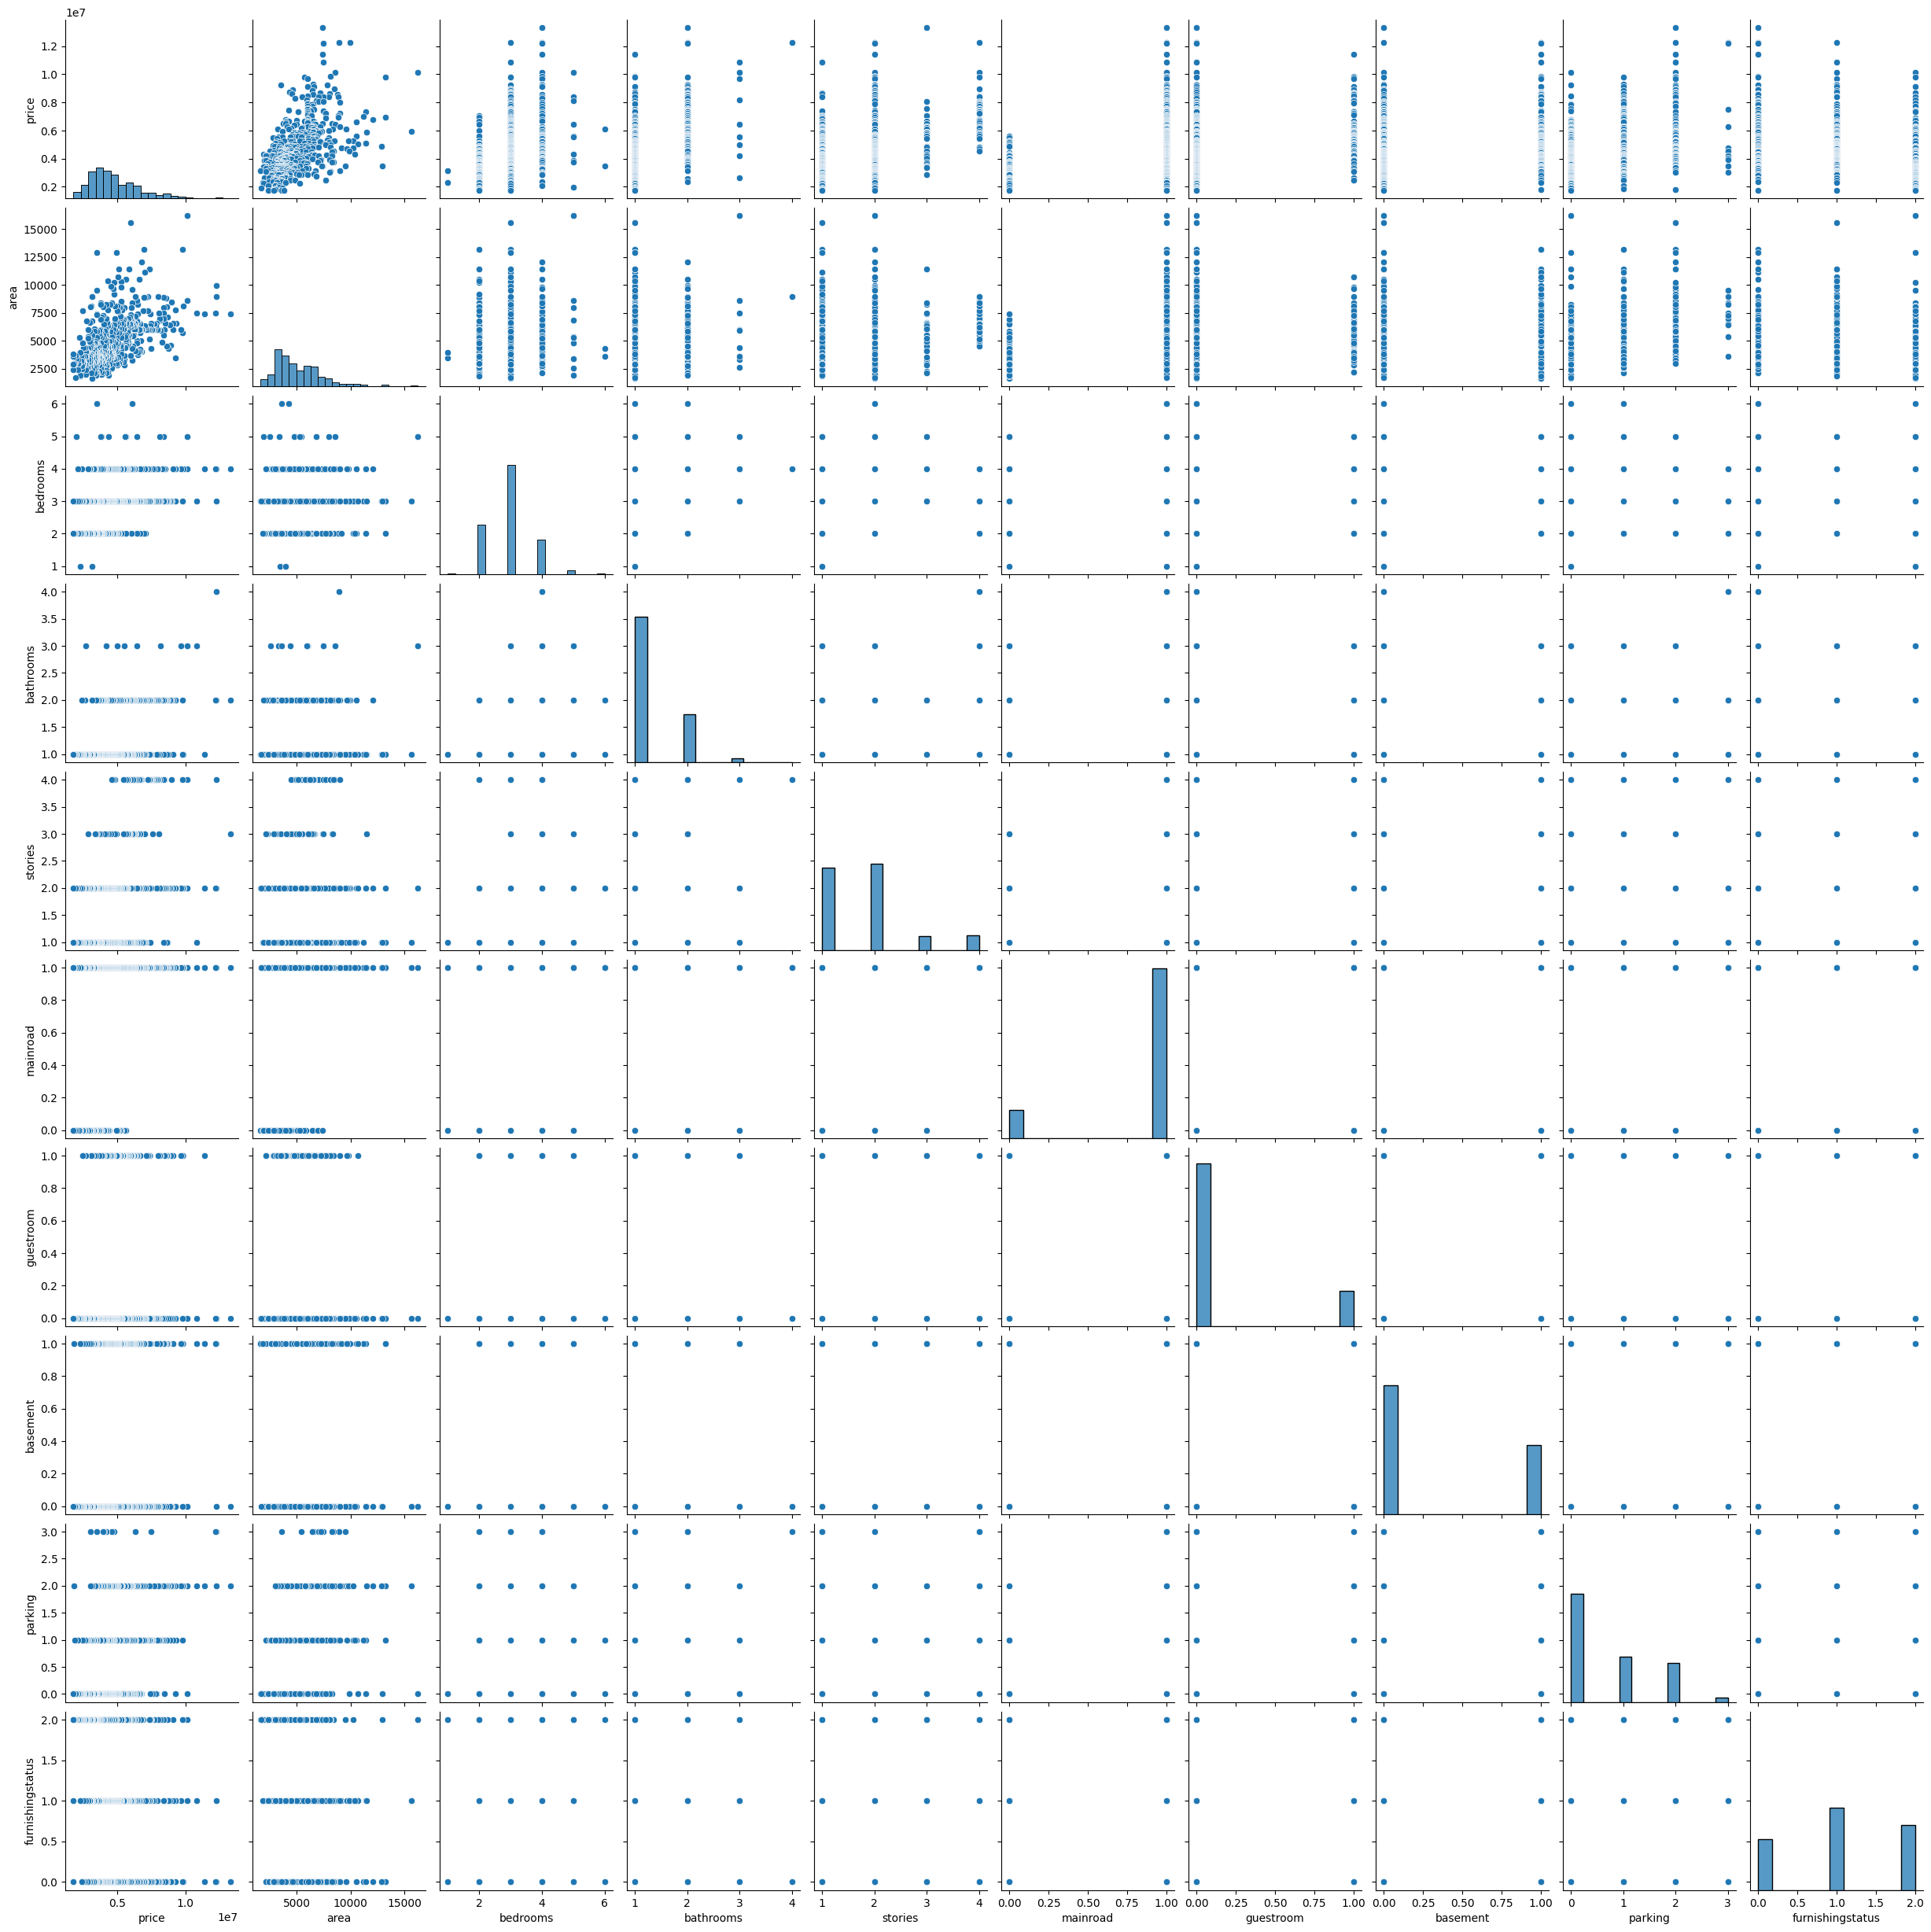

In [ ]:
sns.pairplot(df)

In [ ]:
X = df.iloc[:,1:4] # Loading area, no of bedrooms and no of bathrooms
y = df['price']

NameError: name 'df' is not defined

In [ ]:
X,y

(     area  bedrooms  bathrooms
 0    7420         4          2
 1    8960         4          4
 2    9960         3          2
 3    7500         4          2
 4    7420         4          1
 ..    ...       ...        ...
 540  3000         2          1
 541  2400         3          1
 542  3620         2          1
 543  2910         3          1
 544  3850         3          1
 
 [545 rows x 3 columns],
 0      13300000
 1      12250000
 2      12250000
 3      12215000
 4      11410000
          ...   
 540     1820000
 541     1767150
 542     1750000
 543     1750000
 544     1750000
 Name: price, Length: 545, dtype: int64)

In [ ]:
ss = StandardScaler()
X = ss.fit_transform(X)

NameError: name 'X' is not defined

In [ ]:
# Splitting the data into train and test split in 80,20 ratio
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, shuffle=True)

In [ ]:
# Loading a regression model as it predicts continous values
lr = LinearRegression()

In [ ]:
# Fit the data to the model
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Predictions on test split
y_pred = lr.predict(x_test)

In [ ]:
# Co efficients of linear regression line
slope = lr.coef_
intercept = lr.intercept_
print("Slope : ",slope)
print("Intercept : ",intercept)

Slope :  [801699.28662015 293104.7798911  733121.51207445]
Intercept :  4755705.622907933


In [ ]:
mse = mean_squared_error(y_test,y_pred)
print("Mean squared error : ", mse)

Mean squared error :  2002756585631.0322


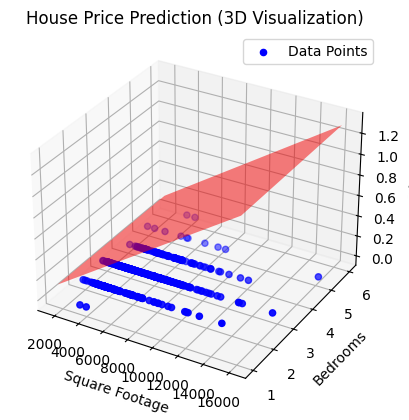

In [ ]:
# Plotting best fit line

# Visualize the relationship between features and the target in 3D (for SquareFootage, Bedrooms, and Price)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for actual data (we'll use SquareFootage and Bedrooms to visualize, and predict Price)
ax.scatter(df['area'], df['bedrooms'], y, color='blue', label='Data Points')

# We can create a meshgrid to predict the price values based on SquareFootage and Bedrooms
x1_range = np.linspace(min(df['area']), max(df['area']), 10)
x2_range = np.linspace(min(df['bedrooms']), max(df['bedrooms']), 10)
X1, X2 = np.meshgrid(x1_range, x2_range)

# Predict the price for each combination of x1 (SquareFootage) and x2 (Bedrooms), keeping Age constant
# We can choose a fixed value for Age, e.g., Age = 10
fixed_age = 10
Y_pred = lr.predict(np.c_[X1.ravel(), X2.ravel(), np.full_like(X1.ravel(), fixed_age)])

# Reshape the predicted prices to match the shape of the meshgrid
Y_pred = Y_pred.reshape(X1.shape)

# Plot the predicted price surface
ax.plot_surface(X1, X2, Y_pred, color='red', alpha=0.5, rstride=100, cstride=100)

# Add labels and title
ax.set_xlabel('Square Footage')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('House Price Prediction (3D Visualization)')

plt.legend()
plt.show()

## Univariate vs Bivariate vc Multivariate data
### Univariate data:
Univariate data refers to a type of data in which each observation or data point corresponds to a single variable. In other words, it involves the measurement or observation of a single characteristic or attribute for each individual or item in the dataset.

### Bivariate data:
Bivariate data involves two different variables, and the analysis of this type of data focuses on understanding the relationship or association between these two variables.

### Multivariate data:
Multivariate data refers to datasets where each observation or sample point consists of multiple variables or features. These variables can represent different aspects, characteristics, or measurements related to the observed phenomenon.

<a href='https://www.geeksforgeeks.org/univariate-bivariate-and-multivariate-data-and-its-analysis/'>Reference</a>

## Univariate model with area vs price

In [ ]:
# Loading dependent and independent variables
X_uni = df['area'] # Same as df.iloc[:,1:2]
X_uni = X_uni.values.reshape(-1,1) # Converting to 2D array
y_uni = df['price']

In [ ]:
# Splitting the data into train and test with 80,20 ratio
x_uni_train,x_uni_test,y_uni_train,y_uni_test = train_test_split(X_uni,y_uni,test_size=0.2, shuffle=True)

In [ ]:
# Loading a linear regression model
lr_uni = LinearRegression()

In [ ]:
# Fit the data to univariate model
lr_uni.fit(x_uni_train,y_uni_train)

LinearRegression()

In [ ]:
# Prediction on test data
y_pred = lr_uni.predict(x_uni_test)

In [ ]:
# Co efficients of linear regression line
slope_uni = lr_uni.coef_
intercept_uni = lr_uni.intercept_
print("Slope : ",slope)
print("Intercept : ",intercept)

Slope :  [801699.28662015 293104.7798911  733121.51207445]
Intercept :  4755705.622907933


In [ ]:
mse_uni = mean_squared_error(y_test,y_pred)
print("Mean squared error : ", mse)

Mean squared error :  2002756585631.0322


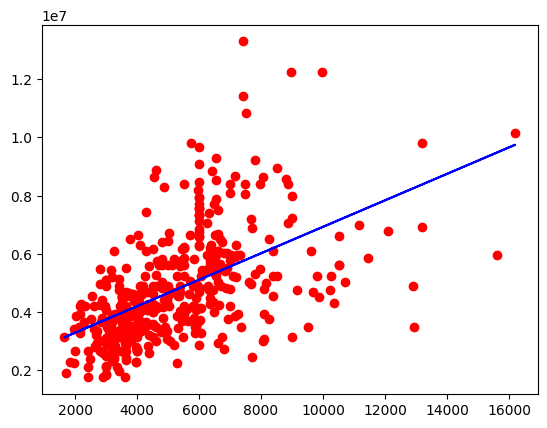

In [ ]:
# Plotting best fit line
plt.scatter(x_uni_train,y_uni_train,color='red')
plt.plot(x_uni_train,lr_uni.predict(x_uni_train),color='blue')

## VIF


The Variance Inflation Factor (VIF) is a measure of how much the variance of the estimated regression coefficients is inflated due to collinearity (correlation) among the predictor variables in a multiple regression model. High VIF values indicate multicollinearity, which can cause issues with the stability and interpretability of the regression model.<br>



The Variance Inflation Factor (VIF) for a predictor \( x_j \) is calculated as:

\[
\text{VIF}(x_j) = \frac{1}{1 - R_j^2}
\]

Where \( R_j^2 \) is the R-squared value obtained by regressing \( x_j \) on all other predictors in the model.


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_no_const = pd.DataFrame(X)
X_no_const.columns = ['area','bedrooms','bathrooms']

In [ ]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X_no_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_no_const.values, i) for i in range(X_no_const.shape[1])]

In [ ]:
vif_data

,Feature,VIF
0,area,1.047002
1,bedrooms,1.171470
2,bathrooms,1.189125


## Ridge regression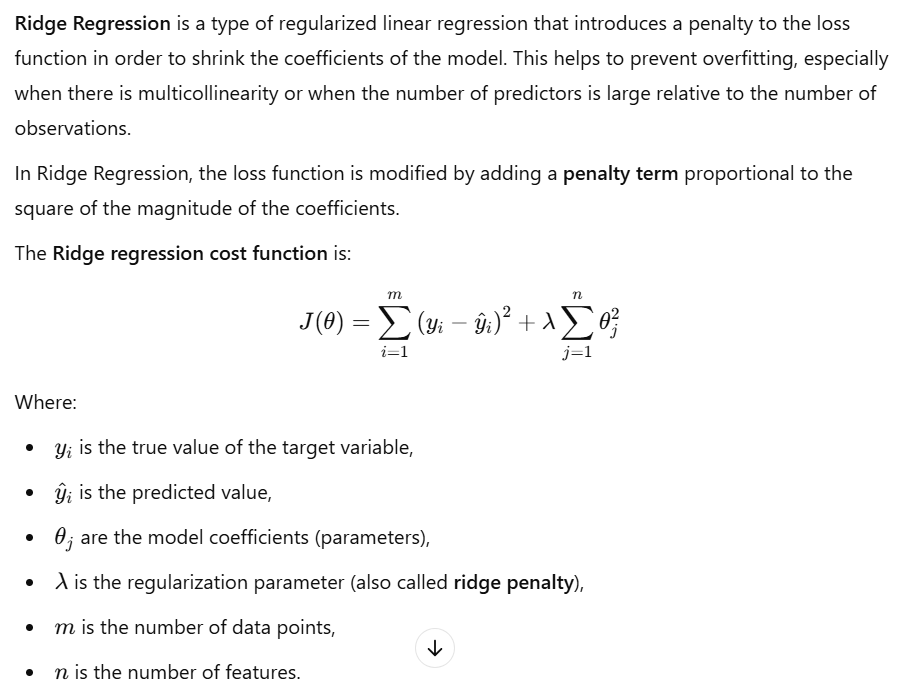

The parameter λ controls the strength of the penalty:

When λ=0, Ridge Regression becomes ordinary linear regression.<br>
When λ is large, the coefficients are heavily penalized, leading to small or even zero values for some coefficients.

In [ ]:
alpha = 1.0  # Regularization strength (lambda in the formula)
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(x_train, y_train)

In [ ]:
# Make predictions
y_pred_train = ridge_model.predict(x_train)
y_pred_test = ridge_model.predict(x_test)

In [ ]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

In [ ]:
# Display the results
print(f"Training Mean Squared Error: {train_mse:.4f}")
print(f"Testing Mean Squared Error: {test_mse:.4f}")
print(f"Model coefficients: {ridge_model.coef_}")

In [ ]:
# Plotting the true vs predicted values
plt.scatter(y_test, y_pred_test, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Ridge Regression)')
plt.show()

## Lasso Regression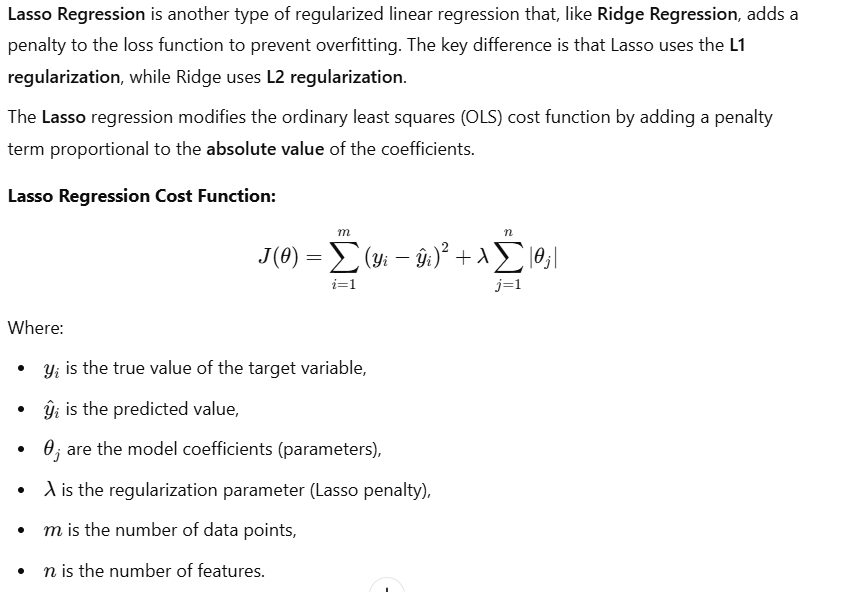

In [ ]:
# Train Lasso Regression model
alpha = 0.1  # Regularization strength (lambda in the formula)
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(x_train, y_train)

In [ ]:
# Make predictions
y_pred_train = lasso_model.predict(x_train)
y_pred_test = lasso_model.predict(x_test)

In [ ]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

In [ ]:
# Display the results
print(f"Training Mean Squared Error: {train_mse:.4f}")
print(f"Testing Mean Squared Error: {test_mse:.4f}")
print(f"Model coefficients: {lasso_model.coef_}")

In [ ]:

# Plotting the true vs predicted values
plt.scatter(y_test, y_pred_test, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Lasso Regression)')
plt.show()
Explanation of the Code:
